First consider an extended Van der Pol Oszillator

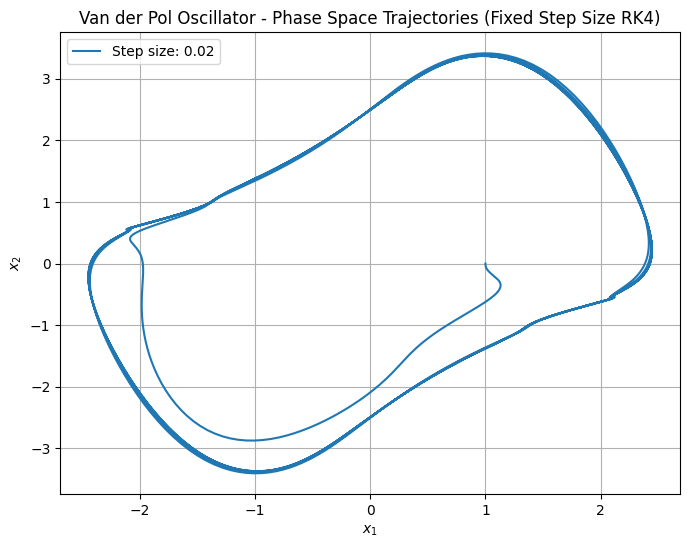

/tmp/ipykernel_136706/3125806598.py:71: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


<function matplotlib.pyplot.show(close=None, block=None)>

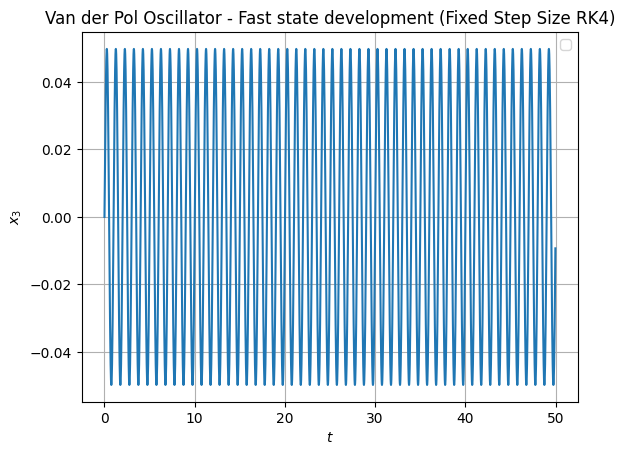

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Define system parameters
mu = 1.0
epsilon_1, epsilon_2, epsilon_3, epsilon_4 = 10, 0.3, 5, 0.01
d1, d2, d3 = 0.2, 0.1, 5 

# Define periodic control input u
def control_input(t):
    return np.sin(2 * np.pi * t), np.sin(2 * np.pi * t) # Example: sinusoidal input

# Define the modified Van der Pol oscillator
def van_der_pol(t, X):
    x1, x2, x3 = X
    u_1, u_2 = control_input(t)
    dx1 = x2 + d1 * u_1 + epsilon_1 * x3
    dx2 = mu * (1 - x1**2) * x2 - x1 + epsilon_2 * x2 + epsilon_3 * x3 + d2 * u_2
    dx3 = - (1 / epsilon_4) * x3 + d3 * u_2
    return np.array([dx1, dx2, dx3])

# Fixed-step RK4 integrator
def rk4_integrate(f, X0, t_span, step_size):
    t_values = np.arange(t_span[0], t_span[1], step_size)
    X_values = np.zeros((len(t_values), len(X0)))
    
    X = np.array(X0)
    for i, t in enumerate(t_values):
        X_values[i] = X
        
        k1 = step_size * f(t, X)
        k2 = step_size * f(t + step_size / 2, X + k1 / 2)
        k3 = step_size * f(t + step_size / 2, X + k2 / 2)
        k4 = step_size * f(t + step_size, X + k3)
        
        X += (k1 + 2 * k2 + 2 * k3 + k4) / 6  # RK4 update rule

    return t_values, X_values

# Initial conditions
X0 = [1.0, 0.0, 0.0]
t_span = (0, 50)  # Time range

# Different step sizes for integration
step_size = 0.02  # Decreasing step sizes, RUKU fails for 0.03

plt.figure(figsize=(8, 6))

# Solve the ODE using RK4 with a fixed step size
t_vals, X_vals = rk4_integrate(van_der_pol, X0, t_span, step_size)

# Extract solutions
x1, x2, x3 = X_vals[:, 0], X_vals[:, 1],  X_vals[:, 2]

# Plot trajectories
plt.plot(x1, x2, label=f"Step size: {step_size}")

# Plot settings
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.title("Van der Pol Oscillator - Phase Space Trajectories (Fixed Step Size RK4)")
plt.legend()
plt.grid()
plt.show()

# Plot the the fast state over time
plt.plot(t_vals, x3)
plt.xlabel("$t$")
plt.ylabel("$x_3$")
plt.title("Van der Pol Oscillator - Fast state development (Fixed Step Size RK4)")
plt.legend()
plt.grid()
plt.show



Next, compare with dynamics obtained when x3 is neglected

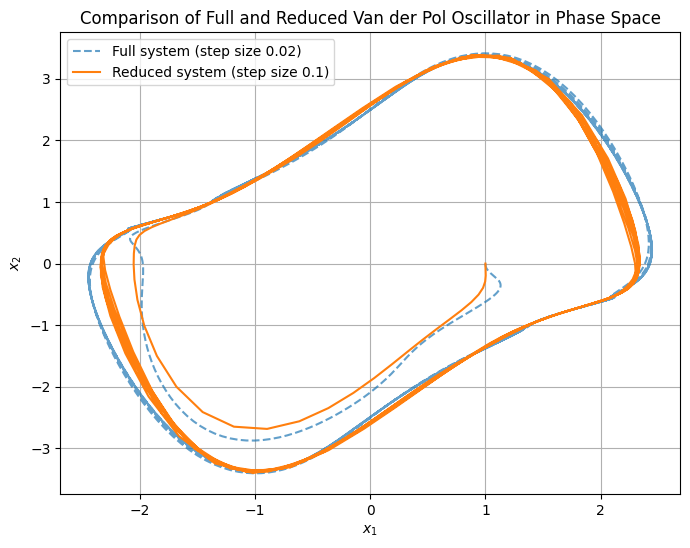

In [9]:
# Define the reduced Van der Pol oscillator (ignoring x3)
def reduced_van_der_pol(t, X):
    x1, x2 = X
    u_1, u_2 = control_input(t)
    dx1 = x2 + d1 * u_1  # Removed epsilon_1 * x3
    dx2 = mu * (1 - x1**2) * x2 - x1 + epsilon_2 * x2 + d2 * u_2  # Removed epsilon_3 * x3
    return np.array([dx1, dx2])

# RK4 integration for the reduced system
def rk4_integrate_reduced(f, X0, t_span, step_size):
    t_values = np.arange(t_span[0], t_span[1], step_size)
    X_values = np.zeros((len(t_values), len(X0)))
    
    X = np.array(X0)
    for i, t in enumerate(t_values):
        X_values[i] = X
        
        k1 = step_size * f(t, X)
        k2 = step_size * f(t + step_size / 2, X + k1 / 2)
        k3 = step_size * f(t + step_size / 2, X + k2 / 2)
        k4 = step_size * f(t + step_size, X + k3)
        
        X += (k1 + 2 * k2 + 2 * k3 + k4) / 6  # RK4 update rule

    return t_values, X_values

# Initial conditions (only x1 and x2)
X0_reduced = [1.0, 0.0]
new_step_size = 0.1  # Choose a new step size

# Integrate the reduced system
t_vals_reduced, X_vals_reduced = rk4_integrate_reduced(reduced_van_der_pol, X0_reduced, t_span, new_step_size)

# Extract solutions
x1_reduced, x2_reduced = X_vals_reduced[:, 0], X_vals_reduced[:, 1]

# Plot comparison of full and reduced system
plt.figure(figsize=(8, 6))

# Plot the full system's trajectory (from the first cell)
plt.plot(x1, x2, label=f"Full system (step size {step_size})", linestyle='dashed', alpha=0.7)

# Plot the reduced system's trajectory
plt.plot(x1_reduced, x2_reduced, label=f"Reduced system (step size {new_step_size})", linestyle='solid')

# Plot settings
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.title("Comparison of Full and Reduced Van der Pol Oscillator in Phase Space")
plt.legend()
plt.grid()
plt.show()

